##### Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

##### Making and Plotting dataset

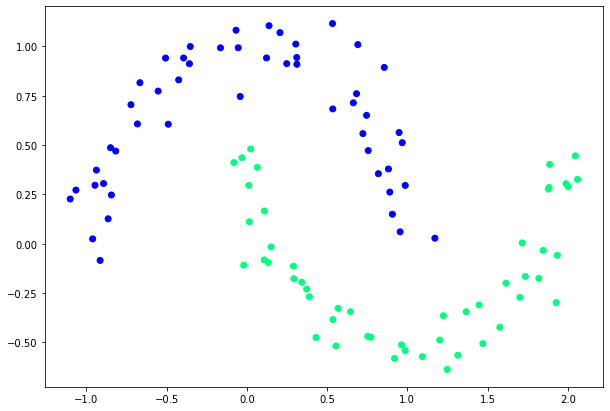

In [2]:
np.random.seed(0)

#Making datasets
feature_set, labels = datasets.make_moons(100, noise = 0.10)

#Plotting dataset
plt.figure(figsize = (10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c= labels, cmap= plt.cm.winter)

In [3]:
print('Feature set shape: ',feature_set.shape)
print('Labels shape: ',labels.shape)
print("One of sample from feature set: ",feature_set[1])
print("Shape of that sample from feature set's:",feature_set[1].shape)
print("One of label sample:",labels[1])
print("Shape of that label's sample:",labels[1].shape)

Feature set shape:  (100, 2)
Labels shape:  (100,)
One of sample from feature set:  [ 1.81989987 -0.17559999]
Shape of that sample from feature set's: (2,)
One of label sample: 1
Shape of that label's sample: ()


In [4]:
labels = labels.reshape(100,1) #reshapping labels
for i in range (5):
    print(labels[i])
print(labels.shape)
print(type(labels))

[0]
[1]
[0]
[1]
[1]
(100, 1)
<class 'numpy.ndarray'>


##### Splitting dataset into train and test set (70/30)%

In [5]:
#Splitting Train set as 70% and Test set as 30%
feature_set_train, feature_set_test, labels_train, labels_test = train_test_split(feature_set, labels, test_size = 0.3,
                                                                                 random_state = 1)

In [6]:
print("Feature train set shape: ",feature_set_train.shape)
print("Feature test set shape: ", feature_set_test.shape)
print("Label train set shape: ",labels_train.shape)
print("Label test set shape: ", labels_test.shape)

Feature train set shape:  (70, 2)
Feature test set shape:  (30, 2)
Label train set shape:  (70, 1)
Label test set shape:  (30, 1)


In [7]:
print("feature training set shape: ", feature_set_train.shape)
print(len(feature_set_train[0]))
c = np.random.rand(2,4)
print(c)
print(c.shape)
print("\nD: ")
d = np.random.rand(4,1)
print(d)

feature training set shape:  (70, 2)
2
[[0.78854551 0.05684808 0.69699724 0.7786954 ]
 [0.77740756 0.25942256 0.37381314 0.58759964]]
(2, 4)

D: 
[[0.2728219 ]
 [0.3708528 ]
 [0.19705428]
 [0.45985588]]


##### Building two layer neural network with hidden layer

In [8]:
#Defining sigmoid function and derivative of sigmoid function

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [9]:
wh = np.random.rand(len(feature_set_train[0]),4)      # hidden layer's weight
wo = np.random.rand(4, 1)                             # output layer's weight
lr = 0.5
print("Wh initial: ", wh)
print("\nWo initial: ", wo)
for epoch in range(2000):
    # feedforward
    zh = np.dot(feature_set_train, wh)
    ah = sigmoid(zh)

    zo = np.dot(ah, wo)
    ao = sigmoid(zo)

    # Phase1 =======================

    error_out = ((1 / 2) * (np.power((ao - labels_train), 2)))
    print(error_out.sum())

    dcost_dao = ao - labels_train
    dao_dzo = sigmoid_der(zo) 
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dao * dao_dzo)

    # Phase 2 =======================

    # dcost_w1 = dcost_dah * dah_dzh * dzh_dw1
    # dcost_dah = dcost_dzo * dzo_dah
    dcost_dzo = dcost_dao * dao_dzo
    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh) 
    dzh_dwh = feature_set_train
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    # Update Weights ================

    wh -= lr * dcost_wh
    wo -= lr * dcost_wo


Wh initial:  [[0.0446123  0.79979588 0.07695645 0.51883515]
 [0.3068101  0.57754295 0.95943334 0.64557024]]

Wo initial:  [[0.03536244]
 [0.43040244]
 [0.51001685]
 [0.53617749]]
10.546880381131785
11.178472260762849
10.279063823851006
10.177285009642922
8.737020438152312
7.239027866525558
5.304223523638205
4.199567326607539
3.9116233601980124
3.691359345306532
3.5118855058766973
3.3691321843074156
3.258415016456703
3.1739243095750957
3.1096182165726454
3.060249082465073
3.0218210380670727
2.991481001942125
2.967215829741067
2.9475866069810674
2.9315458263188496
2.9183179148352933
2.9073201314842017
2.898108854414479
2.890342310433789
2.883754269517433
2.878135212645653
2.8733186770778727
2.8691712374859852
2.8655850718188987
2.862472385951026
2.859761189863858
2.8573920669651485
2.855315680595904
2.853490833035168
2.8518829423960366
2.8504628383636144
2.849205803218156
2.8480908030373007
2.847099867447416
2.8462175862234367
2.8454306984141464
2.8447277551956267
2.8440988418261273
2.84

2.8361845149783993
2.8361809774051427
2.8361774442374323
2.8361739154674783
2.8361703910875087
2.8361668710897647
2.8361633554665056
2.8361598442100076
2.8361563373125622
2.836152834766475
2.8361493365640733
2.836145842697695
2.836142353159696
2.836138867942451
2.8361353870383446
2.836131910439784
2.8361284381391894
2.836124970128994
2.836121506401652
2.8361180469496317
2.8361145917654147
2.8361111408415027
2.8361076941704093
2.836104251744665
2.8361008135568175
2.836097379599428
2.8360939498650755
2.8360905243463517
2.836087103035867
2.836083685926244
2.8360802730101233
2.8360768642801615
2.8360734597290267
2.8360700593494066
2.8360666631340017
2.8360632710755294
2.8360598831667208
2.8360564994003217
2.8360531197690975
2.8360497442658223
2.836046372883292
2.836043005614311
2.836039642451704
2.836036283388307
2.8360329284169743
2.8360295775305726
2.836026230721984
2.8360228879841074
2.836019549309854
2.83601621469215
2.83601288412394
2.8360095575981785
2.8360062351078366
2.836002916645

2.834761982665147
2.8347600114490685
2.8347580420951033
2.8347560746005906
2.834754108962875
2.834752145179305
2.834750183247234
2.834748223164022
2.834746264927033
2.8347443085336343
2.834742353981201
2.8347404012671102
2.834738450388745
2.834736501343494
2.834734554128751
2.834732608741913
2.834730665180381
2.8347287234415646
2.8347267835228753
2.8347248454217295
2.8347229091355493
2.834720974661761
2.834719041997795
2.8347171111410883
2.8347151820890817
2.8347132548392198
2.834711329388953
2.8347094057357363
2.834707483877028
2.8347055638102936
2.8347036455330006
2.834701729042625
2.8346998143366413
2.8346979014125346
2.834695990267792
2.8346940808999044
2.8346921733063706
2.8346902674846888
2.834688363432367
2.8346864611469154
2.8346845606258477
2.834682661866684
2.8346807648669476
2.8346788696241694
2.83467697613588
2.8346750843996187
2.8346731944129244
2.834671306173349
2.834669419678438
2.8346675349257513
2.834665651912847
2.834663770637289
2.834661891096648
2.8346600132884965
2

2.834009839293661
2.8340085122542877
2.8340071862332943
2.8340058612294827
2.8340045372416585
2.8340032142686287
2.8340018923092005
2.8340005713621865
2.833999251426399
2.833997932500651
2.8339966145837603
2.8339952976745435
2.8339939817718225
2.833992666874418
2.8339913529811542
2.833990040090856
2.83398872820235
2.8339874173144683
2.8339861074260395
2.8339847985358966
2.8339834906428756
2.8339821837458112
2.833980877843545
2.8339795729349144
2.8339782690187616
2.8339769660939327
2.833975664159271
2.833974363213624
2.833973063255842
2.833971764284775
2.833970466299278
2.8339691692982036
2.8339678732804097
2.8339665782447527
2.833965284190094
2.8339639911152954
2.83396269901922
2.833961407900733
2.8339601177587013
2.833958828591994
2.833957540399482
2.833956253180039
2.8339549669325366
2.8339536816558524
2.8339523973488623
2.8339511140104476
2.833949831639488
2.8339485502348674
2.8339472697954706
2.8339459903201822
2.833944711807893
2.83394343425749
2.8339421576678663
2.833940882037915

2.833480999550316
2.8334800456260516
2.8334790923160216
2.833478139619619
2.833477187536243
2.8334762360652874
2.8334752852061507
2.8334743349582294
2.8334733853209255
2.8334724362936354
2.8334714878757623
2.8334705400667053
2.8334695928658684
2.8334686462726535
2.8334677002864646
2.833466754906706
2.833465810132783
2.833464865964102
2.8334639224000697
2.8334629794400943
2.8334620370835815
2.833461095329944
2.8334601541785904
2.8334592136289314
2.8334582736803786
2.8334573343323446
2.833456395584242
2.833455457435484
2.8334545198854872
2.8334535829336653
2.833452646579435
2.8334517108222137
2.8334507756614196


In [10]:
print("After training: ")
print("Wh: ", wh)
print("\nWo: ", wo)

After training: 
Wh:  [[-0.44944398  0.3955845  -0.45382773  0.38145337]
 [ 1.75445125 -1.47565477  1.7765012  -1.39935416]]

Wo:  [[-3.10337682]
 [ 4.13837661]
 [-2.92300342]
 [ 3.46930905]]


In [11]:
zh = np.dot(feature_set_test[24], wh)
ah = sigmoid(zh)
zo = np.dot(ah, wo)
ao = sigmoid(zo)
print(ao)
print(labels_test[24])
if ao>0.5:
    print("It's belong to class 1")
else:
    print("It's belong to class 0")

[0.35999963]
[0]
It's belong to class 0


##### Classify test data with trained neural network

In [12]:
#Function to predict test data with a forward pass
#If 'prediction > 0.5' then it belongs to class'1' otherwise class'0'

def prediction(test_set):
    
    predicted_class = np.zeros(test_set.shape[0], dtype = test_set.dtype)
    
    for i in range(len(test_set)):
        zh = np.dot(test_set[i], wh)
        ah = sigmoid(zh)
        zo = np.dot(ah, wo)
        ao = sigmoid(zo)
        
        if ao > 0.5:
            predicted_class[i] =  1
        else:
            predicted_class[i] = 0
        
    return predicted_class
           

In [13]:
predicted_test = prediction(feature_set_test)

In [14]:
predicted_test

array([0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.])

In [15]:
#printing the accuracy 
from sklearn.metrics import accuracy_score
ac = accuracy_score(labels_test,predicted_test)
print('Accuracy is: ', ac )

Accuracy is:  0.8666666666666667


In [16]:
predicted_train = prediction(feature_set_train)

##### Plotting the datapoints with class boundary for train and test data (3D plot)

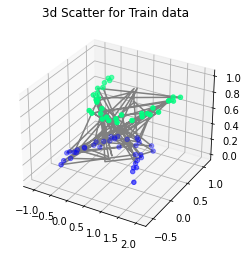

In [17]:
from mpl_toolkits import mplot3d

#for train data

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ao = predicted_train 
x1 = feature_set_train[:,0] 
x2 = feature_set_train[:,1]
ax.plot3D(x1, x2, ao, 'gray')

# Data for three-dimensional scattered points
ao_d = labels_train
x1_d = feature_set_train[:,0]
x2_d = feature_set_train[:,1]
ax.scatter3D(x1_d, x2_d, ao_d, c = labels_train, cmap = plt.cm.winter)
ax.set_title('3d Scatter for Train data')
plt.show()

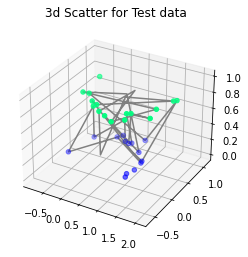

In [18]:
#for test data

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ao = predicted_test 
x1 = feature_set_test[:,0] 
x2 = feature_set_test[:,1]
ax.plot3D(x1, x2, ao, 'gray')

# Data for three-dimensional scattered points
ao_d = labels_test
x1_d = feature_set_test[:,0]
x2_d = feature_set_test[:,1]
ax.scatter3D(x1_d, x2_d, ao_d, c = labels_test, cmap = plt.cm.winter)
ax.set_title('3d Scatter for Test data')
plt.show()